In [1]:
# Load the Drive helper and mount
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
!ls "/content/drive/My Drive/datasets/UcClass"

Found 4640 images belonging to 3 classes.
Found 1163 images belonging to 3 classes.
Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 223, 223, 32)      416       
_________________________________________________________________
activation_15 (Activation)   (None, 223, 223, 32)      0         
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 110, 110, 32)      4128      
_________________________________________________________________
activation_16 (Activation)   (None, 110, 110, 32)      0         
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 55, 55, 32)        0         
____________________________________

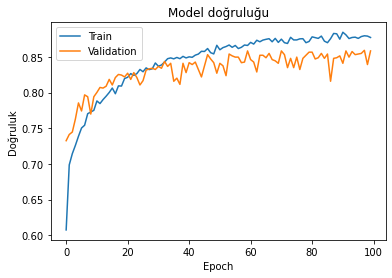

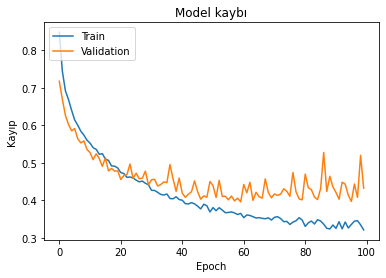

In [5]:
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Conv2D, MaxPooling2D 
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense 
#from keras import backend as K 

train_dir = '/content/drive/My Drive/datasets/UcClass/train'
validation_dir = '/content/drive/My Drive/datasets/UcClass/val'

model = Sequential() 
model.add(Conv2D(32, (2, 2), input_shape = (224, 224, 3))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(32, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Conv2D(64, (2, 2))) 
model.add(Activation('relu')) 
model.add(MaxPooling2D(pool_size =(2, 2))) 

model.add(Flatten()) 
model.add(Dense(64)) 
model.add(Activation('relu')) 
model.add(Dropout(0.5)) 
model.add(Dense(3)) 
model.add(Activation('softmax'))

train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)
 
train_generator = train_datagen.flow_from_directory(
    train_dir,
    batch_size=32,
    class_mode='categorical',
    target_size=(224,224))
 
validation_datagen = ImageDataGenerator(rescale=1./255)
 
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    batch_size=32,
    shuffle=False,
    class_mode='categorical',
    target_size=(224,224))

optimizer = tf.keras.optimizers.RMSprop(lr=1e-4)
#optimizer = tf.keras.optimizers.Adam(lr=1e-4)
#optimizer = tf.keras.optimizers.Adamax(lr=1e-2, beta_1=0.9, beta_2=0.999)
#optimizer = tf.keras.optimizers.Adadelta(lr=1.0, rho=0.95)

model.compile(loss='categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

history = model.fit_generator(
    generator=train_generator,
    validation_data=validation_generator,
    steps_per_epoch=train_generator.n//train_generator.batch_size, 
    validation_steps=validation_generator.n//validation_generator.batch_size,
    epochs=100)

model.save('/content/drive/My Drive/datasets/UcClass/customModelRmspropE100.h5')

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model doğruluğu')
plt.ylabel('Doğruluk')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model kaybı')
plt.ylabel('Kayıp')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
